---
Student Project for the course of Microeconometrics (2020) | M.Sc. Economics, Bonn University | [Jinju Rhee]


# Replication of Curto-Grau, M., Solé-Ollé, A., & Sorribas-Navarro, P. (2018) <a class="tocSkip">
---

---

This notebook contains the replication of following paper;
> Curto-Grau, M., Solé-Ollé, A., & Sorribas-Navarro, P. (2018). Does electoral competition curb party favoritism?. American Economic Journal: Applied Economics, 10(4), 378-407.




The order of content is similar to the structure of the paper, but the tables and figures might be named different with Curto-Grau et al. I marked as "extended" or "extension" some part which is exclusively evaluated by myself. 



<span style="color:orange">**NOTE**:</span> The original data provided by the authors can be found [here](https://www.aeaweb.org/articles?id=10.1257/app.20160618). 




<span style="color:orange">**NOTE**:</span> The auxiliary files and the data file can be found [here](https://github.com/HumanCapitalAnalysis/microeconometrics-course-project-jinju-rhee). 

---

In [1]:
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import scipy
import scipy.interpolate
import econtools
import econtools.metrics as mt

import matplotlib.pyplot as plt
from IPython.display import Image
from localreg import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from auxiliary.auxiliary_subset import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *

In [4]:
data = pd.read_stata('data/db_main.dta')
data_full = pd.read_stata('data/db_full.dta')
data_added = pd.read_stata('data/db_added.dta')
data_mar = pd.read_stata('data/db_marginal.dta')

---
# 1. Introduction
---

   Curto-Grau et al. (2018) examined the political favoritism in Spain and the impact of the electoral competition on it by exploiting RDD(Regression Discontinuity Design) frame work. Political favoritism is regarded as a major political risk of government intervention, such as financial aid or transfer program which is controled by regional government. However, earlier studies have unveiled that political favoritism can be curbed by political participation and electoral process. In particular, it is suggested that political favoritism florishes when there are no elections or when elctions are uncompetitive by Burgess et al. (2015). To investigate the relation of the political favoritism to electoral competition, the study used information on capital transfers from regional to local government in Spain, considering that the intergovernmental transfers like this kind is especially vulnerable to the party favoritism.  
  
  In order to identify the effect of party favoritism, the study used a ***regression discontinuity (RD) design*** for close elections, comparing municipalities in which the ideological bloc of the regional incumbent won or lost the previous local election by a narrow margin. The treatment is a situation in which the ideological bloc to which the regional president belongs has a majority of seats in the local council. It used a forcing variable based on a calculation of the votes that the regional president’s bloc must lose (gain) at the local election in order to lose (gain) the majority of seats on the local council. Hence the analysis of the case relys on a **"fuzzy" RDD**, taking into account that the ideology doesn't predict the alignment status with certainty. 
  
   This notebook contains the main results of CURTO-GRAU ET AL. (2018), such as 1) Estimating LATE and HLATE, 2) RDD Validity check, 3) visualisation of the result with plots and 4) Robustness test. Nevertheless some of results, for instance the estimated transfer gap between high competition and low competition group, has not been fully replicated as the paper shows, most of the results and validity checks in my replication support the main result of the paper. 

---
# 2. Institutional Context
---

Before diving in to the analysis, we need to be familiar with the policital system in Spain first. Here is the explanation on the Spanish government political structure, how the expenditure responsibility is distributed among the layers of government and how their elections are carried out. 

The Spanish government comprises three layers: central, ***regional***, and ***local***. There are seventeen regional governments, the so-called Autonomous Communities(ACs), which have fairly wide-ranging spending responsibilities. Spain’s local layer consists of over 8,000 municipalities, most of which are relatively small. Curresnt spending of municipalities is financed by their own revenues (two-thirds) and unconditional trans(one-third). However, the funding of capital spending is heavily dependent on grants, which in 2008 represented 38 percent of local investment. Capital grants to municipalities are transferred primarily from the regional layer of government (54 percent).

*Elections to the regional parliament* are held every four years. Voters choose between several party lists, and the electoral system is based on the d’Hondt rule with a threshold. Representatives elect the regional president by simple majority and she, in turn, decides the composition of the Cabinet. Around a third of the incumbents sit in minority or coalition governments. In any case, the vast majority of regional presidents belong to the PSOE(the main party on the left) and the PP(the only national party on the right), 36 and 51 percent respectively (in the sample used in analysis). Regionalist parties held the regional presidency in the rest of the cases (13 percent).

*Local elections* are held every four years on the same day throughout all the Spanish municipalities. Voters choose between several closed party lists. The electoral system is a proportional one, votes being allocated to seats using the d’Hondt rule with a 5 percent vote threshold. After that the mayor is elected by a simple majority of the council. The council operates as a small representative democracy, and has to reach a majority vote to pass the initiatives and regulations proposed by the mayor, who acts as the agenda-setter.

*Most regional elections and local elections are concurrent (i.e., held on exactly the same day).* This happens in 12 out of the 15 regions in our sample, meaning that only in 3 regions regional and local elections are staggered (in Galicia, Catalonia, and Andalusia). In this latter group, the lapse between local and regional elections is between one and two years, suggesting that even in this case the regional incumbent might care about the competitiveness of future regional elections. In any case, the study uses all regional elections in order to obtain the main results. 

---
# 3. Theoretical Background
---

 The following describes the theoretical model in which the study is based. This helps the study to predict on the effect of electoral competition on the political favoritism and derive corresponding hypothesis. 

Before digging into the model construction, let me explain the main hypothesis and brief logical background on it. The follwoing is the main hypothesis on the study.
   
     when the regional incumbent perceives a higher probability of losing office (i.e., electoral competition is high), the degree of party favoritism in the allocation of transfers is lower.
 
 
 When the president of regional goverment allocates the capital, she faces the following trade off; she wants to spread transfer to maximize the probability of winning the regional election, and at the sametime she must concentrate and favor copartisan mayors while undermining those of the opposition with the aiming of maximizing the number of aligned mayors. It is natural to expect that if regional election is very competitive, it is more likely for regional president to allocate transfer without discrimination to maximize her votes rather than concentrate transfer on the alignmented local governments. Contrarily, if the president feel safe, she might be less motivated to equally distribute the transfer. The trade-off the regional president might encounter is baseline logic of the following model.
 


***
$\mathbf{\text{ Model Layout }}$<br>
***


 Two governments constitue the model, regional and local. We assume one regional government and N local governments. Citizens vote separately at local and regional election that take place simultaneously on time. They select the party to rule at each tier by choosing between two candidates. (assuming two party system)

  In making desicion, voters consider the utility derived from transfer allocated from the regional to local government.  Per capita transfers to local government i are denoted by $\tau_i$ , the voter’s utility function $\mathit{u}(\tau_i)$ is assumed to be concave and the marginal utility is assumed to be linear.

(1a) $$\mathit{v}_i^{r,l   } = \mathit{p}^{r   } \mathit{v}_i^{r,0} + (\text{1}-\theta) \mathit{u}(\tau_i) + \epsilon_i^r,$$

(1b) $$\mathit{v}_i^{l,1   } = \mathit{p}^{l   } \mathit{v}_i^{l,0} + \theta(\text{2}\text{a}_i - \text{1}) \mathit{u}(\tau_i) + \epsilon_i^l,$$

where 
- $\mathit{v}_i^{r,l   }$ and $ \mathit{v}_i^{r,0}$ are the **vote margin (i.e., the vote share minus one-half)** obtained by the regional incumbent’s party in municipality i at the regional elections (denoted by r) held in periods 1 (the next election) and 0 (the previous election); and $\mathit{v}_i^{l,1   }$ and $\mathit{v}_i^{l,0}$ are the vote margin obtained by the regional incumbent’s party in municipality i at the local elections (denoted by ℓ ) held also in periods 1 and 0. 
- The coefficients $\rho^r$ and $\rho^l$  measure the degree of **persistence of vote decisions**. 
- The terms $\epsilon^r$ and $\epsilon^r$ are **random popularity shocks** at the regional and local elections, respectively, distributed N(0, $\delta_r$ ) and N(0, $\delta_l$) , which are assumed to be independent of each other.

Suppose that the regional incumbent has the two goals. One is to maximize the probability of winning the current  regional election. The other is to mazimize the number of the aligned mayors, with the purpose of building political capital and raising the chances of winning the future election. Combining these two goals, we have following objective function;

(2)  $$\max_{ \mathit{T}_{i}}  \{ \mathbf{   Pr}( \sum_{i = 1} \mathit{p}^r\mathit{v}_i^{r,0} + (\text{1-}\theta)\mathit{u}(\tau_i) > \epsilon_i^r ) + \eta \sum_{i = 1}  \mathbf{ Pr } ( \rho^l \mathit{v}_i^{r,0} + \theta (\text{2} \mathit{a}_i -\text{1}) \mathit{u}(\tau_i) > \epsilon_i^l  ) - \text{c}(\sum_{i = 1}\tau_i  )\}$$

- The first part of this expression is the probability of wining the current regional election, which depends on the summation of votes across municipalities. The second part is the number of mayors belonging to the regional incumbent’s party, which depends on the summation of the probabilities of winning each local election. 

- The parameter $\eta$ is a coefficient that depends both on the amount of political capital provided by mayors (i.e., how crucial it is to have the mayors’ support during future regional- level campaigns) and on a discount factor (i.e., how important are future versus current regional elections).

- The term $\text{c}(\sum \limits _{i=1}\tau_i)$ is a convex function (i.e., c′ > 0 and c′′ > 0 ) that accounts for the opportunity costs of resources, and the marginal cost is assumed linear (i.e., c′′′ = 0 ).

We can express the probabiliry expression in (2) as

(3a)  $$\mathbf{Pr} \Big( \sum_{i} \mathit{v}_i^{r,1} > \text{0}\Big) = 
\Phi \Big( \frac{\mathit{v}^{r,0} + \text{(1 - }\theta) \sum_i\mathit{u}(\tau_i)}{\sqrt{\mathit{N}}}\Big) =  \Phi^r,$$


(3b)  $$\sum_i\mathbf{Pr}(\mathit{v}_i^{l,1} > 0) = \sum_{i}\Phi (\mathit{v}_i^{l,0} + \theta\text{(2}\mathit{a}_i - \text{1)}\mathit{u}(\tau_i)) = \sum_{i}\Phi_i^l,$$

***
$\mathbf{\text{ Result }}$<br>
***


 Plugging (3a) and (3b) into (2) and maximizing with respect to $\tau_i$,we obtain the following first-order condition:

(4) $$\Gamma = (\mu(\text{1 - } \theta) \phi^r + \eta\theta(\text{2}\mathit{a}_i\text{- 1}\phi_i^l))\mathit{u}'(\tau_i)- \mathit{c}'(\tau_i) = 0, \text{   ∀  } \mathit{i},$$

**Proposition 1**: Party favoritism at close local elections: provided credit spillovers exist ( θ > 0) and mayors’ political capital is valuable ( η > 0), in close local elections (i.e., when v iℓ ,0 = 0 ) aligned mayors will receive more transfers than unaligned mayors:

**Proposition 2**: Regional-level electoral competition and party favoritism: the lower the degree of regional-
level electoral competition (i.e., the larger the previous margin of victory v ̄ r,0 ), the higher the degree of party favoritism at close local elections:

***
$\mathbf{\text{ Hypothesis }}$<br>
***


 The model predicts that 
 
 
 - When regional elections are not too competitive, the regional incumbent will allocate more transfers to aligned than to unaligned mayors that won the local elections by a narrow margin. 
 
 
 - The lower the level of electoral competition at the regional level, the greater the difference in the amount of transfers allocated to aligned versus unaligned mayors that won the local elections by a narrow margin.


The fact that these predictions are conditional on local elections being close has implications for identification. This is what justifies the use of RD to estimating the jump in transfers at the threshold (i.e., when $\mathit{v}_i^{l ,0} = 0$ ). RD has the advantage of providing an estimate that can be credibly interpreted as causal. **Note, however, that the RD only identifies the effect of alignment at close elections (i.e., the local average treatment effect or LATE).** 

---
# 4. Empirical Strategy
---

---
## 4.1. Data Description
---


 The entire analysis is based on the data for Spanish municipalities and regions (i.e., Autonomous Comunities, ACs). The study considers three cross sections of data, for the terms 1996–1999, 2000–2003, and 2004– 2007, with around 2,000 municipalities in each period. The outcomes of the 1995 election affect transfers in 1996–
1999; the 1999 election influences the 2000–2003 transfers; and the 2003 election has an impact on the transfers allocated during 2004–2007. The information comes from a survey on budget outlays conducted by the Spanish Ministry of Finance. This database includes all municipalities larger than 5,000 residents and a representative sample of the rest.


**Table | Descriptive Statistics of Main Variables**

In [5]:
table = descriptive_main(data)
table.style.set_properties(subset= ['Definition'], **{'width-min': '300px'})

,Mean,Standard Deviation,RDD frame,Definition
Variable,,,,
Capital transfers,132.500000,180.760000,outcome variable,Capital transfers from the Regional government per capita
Alignment,0.620000,0.480000,treatment,Dummy equal to one if the party of the mayor is the same as that of the president of the AC
Regional incumbent’s bloc vote margin (v),0.110000,0.330000,forcing variable,% of votes cast at the local elections that have to be added (subtracted from) to the ideological bloc of the Regional incumbent to win (lose) a majority of seats in the local council
Regional seat margin,0.000000,7.450000,heterogeneity effects,Difference between the seat share of the parties in the regional government and the seat share of the main opposition parties in the previous regional election. This variable is demeaned.


Transfer | The study concentrates on the capital transfer from regional to local governments in the two years preceding the next local election. As mentioned in 2.Institutional Context, capital grants are the greater discretion in their allocation. It is expected that the grants matter more in the period running up to local elections. Further, the two-year aggregation helps to reduce the volatility of the variable, and the use of yearly information does not provide any statistical advantage, since the alignment status does not change between years within these two-year periods.




Alignment | The alignment concept used throughout this study can be defined as a dummy equal to one when the mayor and the regional president belong to the same party (Mayor-President alignment). The authors consider that it is in such cases that the incentive to avoid losing credit for the transfers allocated is strongest. 




Forcing Variable | The forcing variable is the Regional incumbent’s bloc vote margin, computed as the votes needed for the ideological bloc of the regional incumbent to win (lose) the majority of seats on the local council, expressed as a percentage of total votes cast at the local elections. To define the ideological blocs, all parties standing at local elections are classified into  three groups: left, right, and local parties. (Note that the municipalities near the threshold means high degree of competition in terms of local election. However, throughout the paper, the variable of interest is the regional level electroral competition, not local-level.)



Regional-Level Electoral Competition | The measures of regional electoral competition are based on the difference between the seat shares controlled by the regional president and those controlled by the opposition (hence forth, Regional seat margin). Specifically, the Regional seat margin is computed as the difference between the seat share of the parties that actually support the regional president in the parliament (i.e., those voting YES in the investiture) and the seat share of the parties that do not support the president. It is important to note that this variable (as the other two) has enough time variation(which is the one used to identify the HLATE in equation (10)). (Note that regional seat margin is different with the variable "regional incumbent bloc seat margin" which is shown in the Figure 1)




Control Variables | In order to provide a further check of the reliability of the RD results and to improve the efficiency of our estimates, the authors also present results when controlling for observed covariates. The variables included are those already used in previous studies (Solé-Ollé and Sorribas-Navarro 2008): log(Population), Population density, Property tax rate, Assessed property value, and Local debt level. Descriptive statistics for control variables will be followed in the replication section. 


---
## 4.2. Identification
---

 Curto-Grau et al. (2018) use the "close-race" regression discontinuity design (RDD) framework to avoid omitted variable problem to estimate the effect of party ideology on votes. The reasoning underpinning this method is that elections won by a narrow margin are, in practice, very similar events to elections lost by a similarly narrow margin. However, there are some difficulties in using RD design. First, the fact that local councils are elected in Spain using party-list proportional representation(PR) precludes the use of a traditional RD. The first challenge posed by such institutional setting is that sometimes no single party holds a majority of seats in the council, which means that the mayor has to be supported by a coalition of parties. The second challenge concerns the difficulties in identifying the vote threshold at which an additional vote switches a seat from one party to another (and, thus, from the coalition supporting the mayor to the opposition). This paper follows the solution proposed by recent studies that have adapted the RD methodology to a PR system (Folke 2014 among others).
 
 
 
 
 First, provided that ideology is a very powerful driver of coalition formation, the treatment is defiend as a situation in which the ideological bloc of the party of the regional president has a majority of seats at the local council. So, when parties on the left of the ideological spectrum have a majority of seats, it is highly likely that the mayor will also belong to the left- wing party bloc. If the regional president belongs to a left-wing (right-wing) party, then we can say that the mayor and the president are aligned(unaligned). The same applies when right-wing parties hold a majority of seats. However, the fact that a small proportion of regional and local parties are able to support both right- and left- wing parties means that the ideological factor will not always work. In the case of regional parties, Curto-Grau et al. (2018) classifys them as belonging to the ideological bloc of the president, if they support that party in the regional parliament. In any case, **“fuzzy” RDD is used**, as in Fiva and Halse (2016), to take into account the fact that ideology does not predict with certainty the alignment status. In this regards, there will be some untreated units with values of the forcing variable equal to or greater than the values for some treated units, and there will be some treated units with values of the forcing variable equal to or less than the values for some untreated units. 
 
 
 
 
 Second, even if the treatment in terms of the discontinuity of seats is relatively straightforward to define, elections won or lost by a difference of one seat are probably not that close in terms of the number of votes. Thus, using the number or the percentage of seats as our forcing variable might not be appropriate (Fiva, Folke,
and Sørensen (2018)). Instead, Curto-Grau et al. use a forcing variable computed as the percentage of votes that the ideological bloc of the regional president must lose (win) in order to lose (win) the majority of seats in the council.

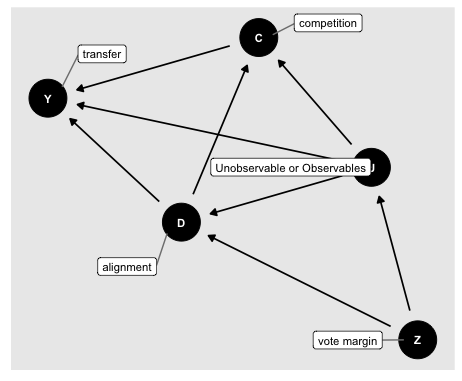

In [6]:
Image(filename="files/Rplot04.png", width = 500, height = 500)

 The above causal graph illustrates how the main variables can influence each other. The regional incumbent's vote margin("Z", forcing variable)determines treated group and control group. If the vote margin is less than zero, the mayor of the local government is likely to be unaligned with the regional incumbent. Otherwise, there is high probability that the mayor and regional president are aligned with the same party. "D" denotes the alignment status. As mentioned above, since the regional vote margin does not pin down the alignment status of mayor and regional incumbent, the analysis relys on fuzzy RDD which allows for the jump in the probability of alignment status which is smaller than 1.  
 
 
 
 Note that based on the theoretical model, it is predicted that when mayor and regional incumbent are aligned, the associated municipality will receive more funds. Moreover, as the regional elcetion competitive("C" represents the indicator of the level of regional eletoral competition, regional seat margin) it is more likely for the regional president to avoid discriminate and equally distribute the funds to maximize its vote.  
 
 
 
 Simply, the main goal of the analysis is to find alignment effect to capital transfer allocation(Z -> D -> Y ) and the heterogeneous effect along the different level of competition (D -> C -> Y). To capture those causal effects, we need some backdoor paths which shoud be blocked by conditioning covariates. By adding U(unobservable or observables), we can block all possible backdoor paths in the graph. To support the identification strategy, the measured covariates in the analysis should be sufficient to block all the path from D to Y. 
 
 
 
 However, most importantaly, to assure that above-mentioned identification strategy works, two main assumptions on RDD must be fulfilled. First, at close election, there should be a clear discontinuity between the transfer assigned to the municipality just left to the cutoff where the regional vote margin is zero and the transfer assigned to the municipality just right to the cutoff.  Second, we need continuity assuption that all other unobservable and observable variables should be continuous at cutoff. In other words, when any other unobservables ("U") are fixed, whether a mayor is aligned with regional president or not should be determined by some randomness, which ensures no precise control over the forcing varaiable. In the following section of replication, we will test validity of RDD regarding those assumptions through visualization and balance test. 

---
## 4.3. Equation Specification
---

 Based on the identification strategy, we will have a closer look on the equation specification and find how the causal effects are captured by the equations. 

**Average Effect**__ The RD analysis involves, as the first step, the estimation of the discontinuity of transfers. To do so, the study uses the following two-equation model:

(7) $$  \tau_{it} = \alpha \mathit{a}_{it} + \mathit{g}\Big( \mathit{v}_{it}^{0} \Big) + \epsilon_{it} , $$


(8) $$  \mathit{a}_{it} = \beta \mathit{d}_{it} + \mathit{h} \Big( \mathit{v}_{it}^{0} \Big) + \epsilon_{it}, \text{ ∀ } \mathit{v}_{it}^{0}\in (-\mathit{h},\mathit{h}), $$

where 


- $\tau_{it}$ it are the per capita capital transfers received by the local government i before local election t 
- $\mathit{a}_{it}$ = 1 if there is alignment between the regional and the local government, and 0 otherwise. 
- $\mathit{v}_{it}^0$ is a variable presenting the percentage of votes in the previous local elections that the parties in the regional president’s ideological bloc would have to lose (if holding the mayoralty) or win (if in the opposition at the local level) to lose (win) a majority of seats in the local council, and so lose (win) control of the government. This variable is computed using a specific algebraic method developed herein. Henceforth, we refer to this variable as the Regional incumbent’s bloc vote margin.
- $\mathit{d}_{it}$  = 1 denotes a situation where this vote margin is positive, and 0 otherwise. 
- $\mathit{g}(\mathit{v}_{it}^0)$ and  $\mathit{h}(\mathit{v}_{it}^0)$ are polynomials in $\mathit{v}_{it}^0$, fitted separately at either side of the threshold using the observations in a neighborhood around the threshold, which we label by h, hereby referred to as the bandwidth.

 Equation (7) is used to estimate the effect of partisan alignment on transfers. Equation (8) is the first stage used to estimate the discontinuity in alignment that we use for identification. The estimates **"$\alpha$"** obtained from the equation (7) by 2SLS, using $\mathit{d}_{it}$ as an instrument for $\mathit{a}_{it}$, is interpreted as a “Local Average Treatment Effect” or **LATE which represents the causal effect of partisan alignment on allocation bias.**

**Heterogeneous Effect**__ The specification in (7) can be modified to analyze the heterogeneous effects of interest. In particular, Curto-Grau et al. (2018) estimates an “Heterogeneous Local Average Treatment Effect”(HLATE) interacting the treatment with an indicator of regional electoral competition.
More concretely, it estimates the following equation:

(9) $$\tau_{it} = \eta_1 \mathit{a}_{it} \mathit{z}_{rt} + \sum_{r}\eta_{3r}\mathit{a}_{it}\mathit{f}_r + \sum_{r}\eta_{4r}\mathit{f}_r + \mathit{l}^r(\mathit{v}_{it}^0) + \mathit{l}(\mathit{v}_{it}^0,\mathit{z}_{rt}),$$



where 

 the term  $\mathit{a}_{it}\mathit{f}_r$ and $\mathit{f}_r$ denote alignment × region fixed effects and region dummies, respectively.
 The expression $ \mathit{l}^r(\mathit{v}_{it}^0)$ denotes a region-specific polynomial and $\mathit{l}^r(\mathit{v}_{it}^0,\mathit{z}_{rt})$ is an interaction between the polynomial and $\mathit{z}_{rt}$. The inclusion of 'alignment × region fixed effects' in the equation means that the estimation of our
heterogeneous effects only relies on variation over time in the level of regional 
- $\mathit{z}_{rt}$ is the level of regional electoral competition (demeaned).
- $\eta_1$ **is the parameter of interest**, which indicates how the alignment effect changes as the degree of electoral competition deviates from the mean.
- The term $\mathit{a}_{it}\mathit{f}_r $ denote a region- specific polynomial.
- $\mathit{l}(\mathit{v}_{it}^0,\mathit{z}_{rt})$  is an interaction between the polynomial and $\mathit{z}_{rt}$.

---
# 5. Replication
---

---
## 5.1. Validity Check
---

***RD Assumptions***__ In order to verify the validity of RD design, Curto-Grau et al. (2018) documented tests on whether the assumptions are satisfied or not. First, it showed that there is a genuine discontinuity in the probability of the treatment. Second, it displayed the density graph of the forcing variable to show that it is continuous at the cutoff so that there is no manipulation implemented on the variable. Third, in the appendix, it showed plots of covariates which does not have systematic discontinuity around the threshold. 

 - 1. Jump at the cutoff(threshold)
 - 2. Not manipulated forcing variable(assignment variable)
 - 3. Continuity of covariates at the cutoff

### 5.1.1. Discontinuity at the Cutoff

**Figure 1 : Alignment Versus Forcing Variable**

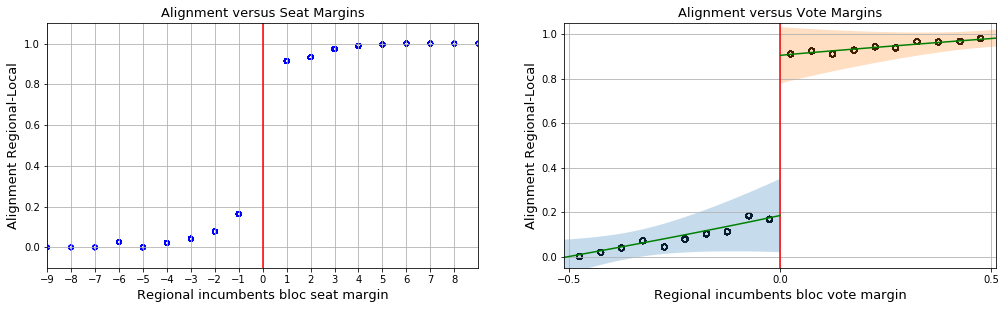

In [7]:
bf1 = subset_for_figure(data)
plot_figure1(data=data, boot_figure1 = bf1)

 The both graphs show a considerable jump at the cutoff. The jump in the probability of treatment is lower than one, and this justifies the use of a “fuzzy” design. Moreover, it is notable that the left-side figure has x axis as Regional incumbents bloc seat margins. Curto-Grau et al. (2018) pinpoint "Regional incumbents bloc seat margins" as a candidate of forcing variable. However, since the group of municipalities located at the −1 and +1 seat margin values is quite large and has considerable internal variability in the popularity of the party of the regional incumbent, Curto-Grau et al. (2018) uses the vote margin as the forcing variable. In this replication, I did not cover the procedure of calculating the vote margin, considering that following procedure is heavily technical and that it is not the main point of the validity check.

### 5.1.2. Test of the Manipulation of the Forcing Variable

**Figure 2: Continuity Of The Forcing Variable**

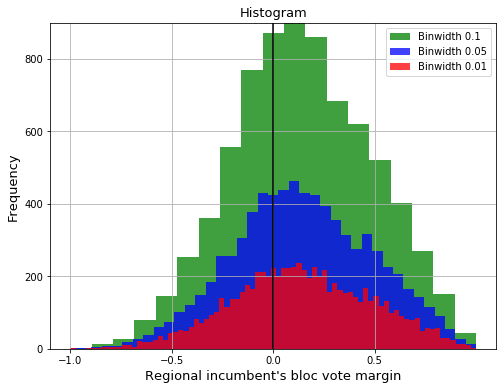

In [10]:
plot_histogram(data_full)

 To check if the forcing variable is manipulated, I checked its histogram along different size of binwidth, as Curto-Grau et al. (2018) did. The figure doesn't show any systematic discontinuity around the cut off for all different bindwidth, and therefore there is no manipulation on the forcing variable. 

### 5.1.3. Discontinuity Test of Control Variables

As the last step of the validity check, I tested the continuity of predetermined covariates to see that all factors, besides alignment, that could potentially influence the level of transfers are continuous at the threshold. This is crucial assumption which should be satisfied especially when we estimate the HLATE and fix the regional effects which might have causal effects to the municipality's transfer. 

**Table | Descriptive Statistics of Control Variables**

In [9]:
controls = descriptive_controls(data)
controls.style.set_properties(subset= ['Definition'], **{'width-min': '300px'})

,Mean,Standard Deviation,Definition
Variable,,,
Debt burden,0.070000,0.070000,"Debt burden (capital, item 9 of the spending budget, + interest, item 3), as a share of current revenues"
Property tax rate,0.590000,0.170000,"Nominal property tax rate (IBI), % on assessed property value"
Property value,20.440000,21.700000,Assessed property value (thousands of EUR) per capita
Population,14301.950000,80848.870000,Resident population
Population density,361.660000,1306.990000,Population per square kilometer
% Old,0.170000,0.050000,% resident population older than 65 years
% Young,0.210000,0.040000,% resident population younger than 14 years
% Immigrant,0.010000,0.030000,% resident population non-EU immigrant
% Unemployed,6.170000,2.930000,% resident population unemployed


**Extension | Figure 3: Discontinuity Test of Covariates**

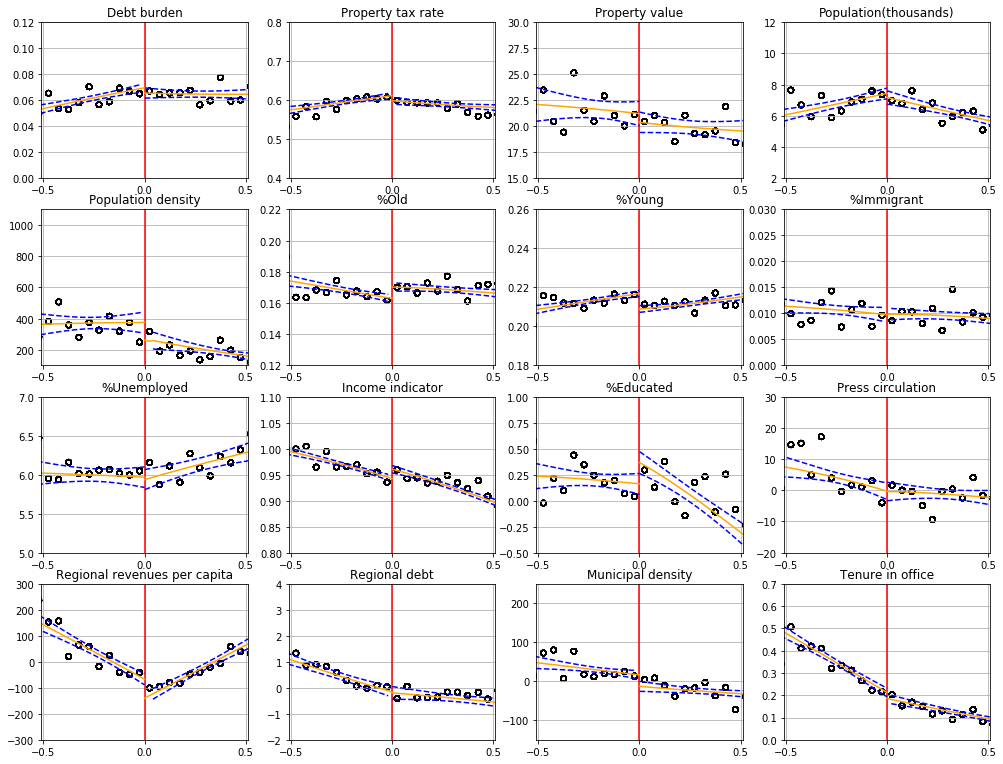

In [9]:
bfc = subset_for_figure3(data)
bfc = bfc.dropna()
plot_cc(data = bfc,  boot_fig_cov = bfc)

**Table | Estimates of Discontinuity Test**

In [12]:
Balance_test_table(data)

,Coef.,SE,P-value,Bandwidth,Observations,Variable
Variable,,,,,,
debt,0.054778,0.031072,0.078102,0.219,2891.0,Debt burden
tipo,0.064805,0.091267,0.477781,0.171,2326.0,Property tax rate
vcp,4.267265,9.924047,0.667258,0.216,2858.0,Property value
pob,24392.407399,24118.313436,0.312002,0.197,2629.0,Population
density,-875.680245,731.004926,0.231151,0.171,2326.0,Population density
pob_mes6591,-0.004188,0.025784,0.871001,0.185,2478.0,% Old
pob_5_1491,-0.002629,0.017444,0.880230,0.183,2464.0,% Young
extr_noeu91,0.001900,0.012452,0.878753,0.223,2921.0,% Immigrant
unempl,0.256747,1.025431,0.802324,0.237,3064.0,% Unemployed


In the visualization of discontinuity test, all plots show no critical discontinuity around the cutoff. However, in the table some varibles, such as property value, population, population density, press circulation, regional revenue, municipal density and regional seat margin have estimated coefficient which is far from zero, which tells that those variables have causal relationship with the forcing variable. This result is partly similar to the discontinuity test result of Curto-Grau et al. (2018) in that it also shows non-zero coefficient of population, population density, press circulation and regional seat margin. It suggests that some outliers are not removed when the result of the table is obtained. (While plotting the discontinuity text, I removed some outliers of population variable as Curto-Grau et al. (2018) did, but didn't care about outliers in othe variables, which can be fixed later.)

---
## 5.2. Result
---

 The following shows the replication of the main result of Curto-Grau et al. (2018). This section is divided into two parts; one(5.2.1 Partisan Alignment and Transfers) is for the result of Local Averge Treatment Effect(LATE) which indicates the effects of the alignment status on the capital transfer allocation, and the other part(5.2.2  The Role of Regional Level Electoral Competition) is for the result of Heterogeneous Local Average Treatment Effect(HLATE) which represents how the level of competition of the regional election influences the alignment effects on transfer. Before reviewing the RD estimates, we will see the visualization evidence which helps to intuitively understand the major outcomes. 

### 5.2.1. Partisan Alignment and Transfers

**Figure 4: Capital Transfers Versus Regional Incumbent's Vote Margin**

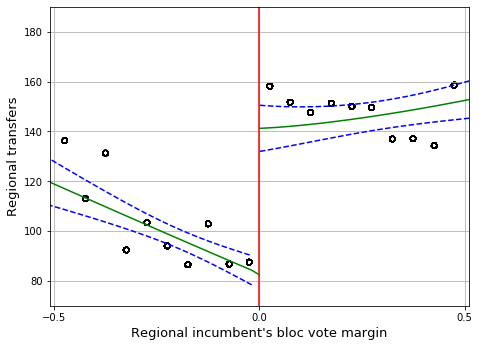

In [15]:
bf4 = subset_for_figure(data)
plot_figure4(data=data, boot_figure4 = bf4 )

 In the Figure 4, we can see the apparent discontinuity in transfers around the cutoff. The graph provides evidence of a clear and sizeable discontinuity around the threshold: municipalities marginally to the right of the cut-
off (those likely to be aligned) receive larger transfers than those marginally to the left (those likely to be unaligned).

**Table1: Average Effect of Partisan Alignment on Capital Transfers**

In [13]:
table = table1(data,covariates = 0)
table.round(3)

,2nd_stage,Std.err(2),P-Value(2),1st_stage,Std.err(1),P-Value(1),Observations
RD,,,,,,,
Global,98.057,15.737,0.000,0.701,0.019,0.0,6050.0
Local(bd=2h*),94.791,13.749,0.000,0.714,0.018,0.0,4410.0
Local(bd=h*),102.570,18.714,0.000,0.715,0.025,0.0,2576.0
Local(bd=h*/2),86.986,23.555,0.000,0.727,0.036,0.0,1383.0
Local(bd=h*/4),71.702,31.824,0.025,0.719,0.052,0.0,683.0


 The Table 1 shows the RD estimates with different bandwidth. THe optimal bandwidth is h* = 0.193, which is calculated  based on the procedure proposed by Calonico, Cattaneo, and Titiunik (2014). We can also check that the estimates are a little bit smaller when the corresponding bandwidth is getting smaller, but still the coefficients are statistically significant. Regarding the bandwidth sensitivity check, we will do further analysis in the robustness check section. The Global estimates is equivalent to the outcome when the corresponding bandwidth is equal to one. Including the standard error and p-values, the result of RD estimates replication presents almost the same result of the paper.

In [8]:
# Obtaining average transfer amount of the left of the cutoff
data1 = append_subset_for_figure(data)
y11 = data1[(data1.dist1 < 0)].loc[:, 'av_tk']
y11.mean()

99.7658462524414

 As mentioned above, the analysis is based on the 2SLS regression, and the the RD estimate of LATE corresponds to the 2nd_stage of the regression. In the Table 1, we can check that the 2SLS estimate associated with the optimal bandwidth is 102.57, and the estimate is precisely estimated, in other words, statistically significant. It is interpreted that aligned municipalities would obtain around 102 euros per capita more than unaligned local governments. Considering that the transfers received by unligned municipalities just at the left of the cutoff is around 100 euros per capita, an aligned municipality would receive, on average, about 202 euroes per capita, approximately twice per capita transfers than a similar unaligned one.

**Table1(extended) : Average Effect of Partisan Alignment on Capital Transfers With Controls**

In [14]:
table = table1(data,covariates = 1)
table.round(3)

,2nd_stage,Std.err(2),P-Value(2),1st_stage,Std.err(1),P-Value(1),Observations
RD,,,,,,,
Global,98.345,15.013,0.000,0.701,0.019,0.0,6050.0
Local(bd=2h*),94.856,13.095,0.000,0.714,0.018,0.0,4410.0
Local(bd=h*),97.453,17.724,0.000,0.715,0.025,0.0,2576.0
Local(bd=h*/2),83.939,22.322,0.000,0.728,0.036,0.0,1383.0
Local(bd=h*/4),76.387,31.129,0.014,0.717,0.052,0.0,683.0


 However, the estimates measured in the above table is the coefficient of the regression without conditioning the observed baseline covariates. Thus, for the precise alignment effects we need to do regression with inclusion of control variables. Table1(extended) shows the result of the regression. Overall, the result is not different with the one without control variables. The coefficient associated with the optimal bandwidth is around 97 euros per capita, which is slightly less than the result in Table1 but not remarkably different value. Therefore, the estimate of LATE is robust to the inclusion of control variables. Furthermore, the replication results support that the degree of party favoritism in the allocation of these transfers seems very high.

### 5.2.2. The Role of Regional Level Electoral Competition

**Figure 5 : Capital Transfers Versus Regional Incumbent's Vote Margin**

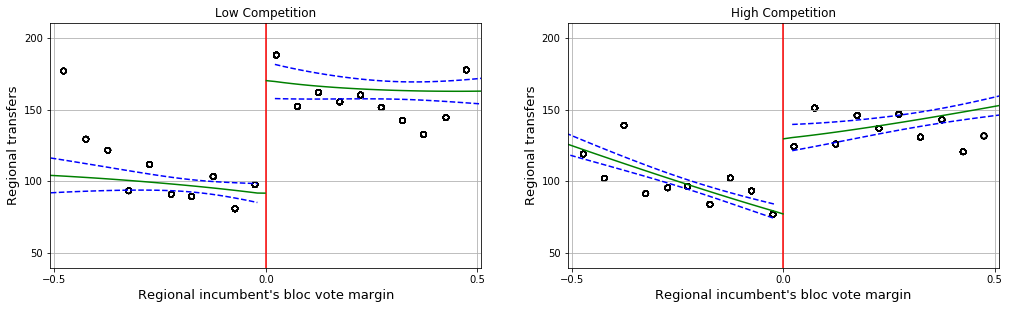

In [7]:
plt.figure(figsize=(17, 4.5))

plt.subplot(1, 2, 1)
lc = append_av_for_figure5(data, low_comp = 1)
plot_subplot_fig5 (data = lc, low_comp = 1, boot_figure5 = lc, plot_title = "Low Competition")


plt.subplot(1, 2, 2)
hc = append_av_for_figure5(data, low_comp = 0)
plot_subplot_fig5 (data = hc, low_comp = 0, boot_figure5 = hc, plot_title = "High Competition")

 As Curto-Grau et al. (2018) did, I also ploted figures to compare the alignment effects(LATE) between the two subsamples, lower competition group and higher competition group by graphical analysis. If a municipality's seat margin is above the median, it belongs to low competition group, otherwise it belongs to high competition group. We can see in the graph that the gap between the green lines at the cutoff in Low competition group is slightly larger than the gap in High competition. 
 
 
 However, this graphical analysis has limitations on its result. First, being a region with a high or a low level of regional electoral competition might be correlated with many other regional traits. Second, the efficiency of the estimator might be substantially improved by exploiting the whole range of variation in the regional competition variable instead of using only a dummy. 
 
 
 Now we will save time in graphical analysis and jump into reviewing the RD estimates of HLATE. First, to check the validity of RD estimates of heterogeneous effect, we should cehck two assumptions. First, it should be satisfied that the source of heterogeneity $\mathit{z}_{rt}$ also has to be continuous at the threshold. The second assumption is that, conditional on the forcing variable, the assignment of the interaction variable has to be random, which means ,in this context, that conditional on the polynomial of the vote margin at the local elections, municipalities in regions with high- and low-regional electoral competition should not differ in unobserved factors that may influence the allocation of transfers.
 
 
 

 
 To check the first assumption, I ploted the indicator of regional election competition with the forcing variable. As we can see through the figure 6, there exist no systematic discontinuity around the thereshold, so that in the strategy the first assumption is satisfied.  

**Figure 6: Continuity Of The Regional Seat Margin**

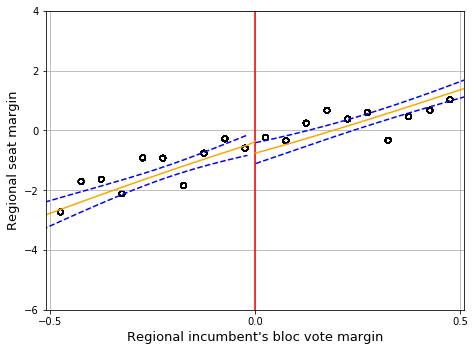

In [18]:
sf6 = subset_figure6(data)
plot_figure6(data=data, boot_figure6=sf6)

 Taking the second assumption into account, as mentioned in the section 4.3.equation specification, Curto-Grau et al. (2018) measured HLATE based in using Alignment × Region fixed effects to ensure that the results are not driven by the omission of confounding factors. In other words, the inclusion of elignment × region fixed effects means that the estimation of the heterogeneous effects only relies on variation over time in the level of regional competition. 


**Table 2 : Effect of Regional Electoral Competition Party Favoritism**

In [7]:
table22 = table2(data)
table22.round(3)

,Alignment * RSM,Std.err(2),P-Value(2),RSM,Std.err(1),P-Value(1),Observations
RD,,,,,,,
Global,8.546,2.709,0.007,-0.941,2.187,0.674,6050.0
Local(bd=2h*),7.244,3.412,0.052,1.564,1.466,0.304,4410.0
Local(bd=h*),7.706,3.782,0.061,1.222,1.315,0.369,2576.0
Local(bd=h*/2),10.128,4.987,0.062,0.905,2.384,0.710,1383.0
Local(bd=h*/4),6.301,4.828,0.213,2.784,5.793,0.638,683.0


 The above table presents the result of the regression on the heterogeneous alignment effects along the different level of regional electoral competition. The main result we are interested in is the estimate on how the alignment effect strengthens (loosens) as the level of regional electoral competition decreases (increases) over time. The interaction term Alignment × Regional seat margin captures this effect.
 
 
 
 The replication of Table 2 partly supports the result of Curto-Grau et al. (2018). Most importantly, even if the coefficient of above table is almost the same with the result of the paper, the associated p-value doesn't support the result of Curto-Grau et al. In the paper, the p-value of HLATE of optimal bandwidth is 0.046, whereas here it presents 0.061. The biggest difference is that Curto-Grau et al. obtained the p-value from wild bootstrapping, while I obtained it without bootstrapping. Thus, according to replication result, without bootstrapping the HLATE estimate of optimal bandwidth is not statistically significant. Only the global estimate of HLATE is precisely estimated. 
 
 
 
  However, assuming that the coefficient is statistically significant, it will support the evidence that when regional incumbents face uncontested regional elections, the level of party favoritism in the allocation of transfers increases. Moreover, in the next section we will see that the preciseness of the estimate improves when we include time vayring confounders. 
 

**Figure 7: Marginal Alignment Effect**

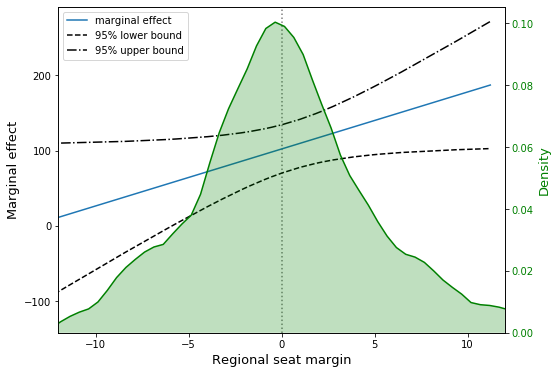

In [5]:
plot_figure7(data = data_added, color = 'green')

In [6]:
# Average Marginal Effect computed with the inclusion of time vayring confounders
data_added["marginal"].mean()

102.08592987060547

 The above figure is the replication of Figure 7 as Curto-Grau et al. (2018) ploted in the paper. This plots the RD marginal effects against the value of the Regional seat margin. The graph highlights the range of variation in the level of party favoritism: the marginal effect ranges from 0 to 200 euros from one extreme to the other of the x-axis. The paper says that the weighted average of the Alignment × Region fixed effects amounts to 109 euros, whereas in the replication, the mean of marginal variable turns out 102 which is almost equal to the LATE reported in Table 1. The marginal effect is the non-linear prediction of weighted average on the coefficients of all interaction with regional dummies plus the coefficient of interaction with the deviation of regional seat margin from the mean.
 
 
 
 Note that the estimate of HLATE in Table 2 is not statistically significant. It doesn't make sense to implement further analysis on the marginal effect with unprecise estimates. However, in the following section, we will see that the estimates of HLATE get precisely estimated when the regression includes all interactions with observed covariates. Thus, I will postpone describing interpretation of the heterogeneity in marginal effects to the next section. 

### 5.2.3. Time Varying Confounders

 Considering that the effect of regional electoral competition on party favoritisam can be correlated to other regional level factors over time, Curto-Grau et al. implemented the similar regressions to the table 2 adding interactions between alignment and and regional-based measured time-varying confounders. Importantly, it is notable that the coefficient of Alignment × Regional seat margin recover the statistical significance with inclusion of time varying confounders. Thus, the replication in this notebook can support the result on HLATE of Curto-Grau et al., only if the regression includes observed time varying confounders.

**Table 3 : Effect of Regional Electoral Competition Party Favoritism with Contolling Time Varying Confounders**

In [19]:
table44 = table4(data)
table44.round(3)

,(1),(2),(3),(4),(5),(6),(7)
Covariates,,,,,,,
Alig * Reg. seat margin,5.73368,7.67117,7.66298,7.2007,11.0141,5.98381,7.114
standard error(0),2.56493,3.74136,3.56849,3.57603,4.56386,2.73906,2.271
p-value(0),0.042198,0.0595391,0.0497572,0.0636875,0.0300905,0.046418,0.007
Alig * Revenue,0.330326,,,,,,0.113
standard error(1),0.0682998,,,,,,0.185
p-value(1),0.000263901,,,,,,0.552
Alig * Debt,,0.545291,,,,,2.575
standard error(2),,5.84644,,,,,3.985
p-value(2),,0.927012,,,,,0.529


Curto-Grau et al. describes the reasoning on how each variables might be correlated with the measure of regional electoral competition. First two columns show the result of regression with the inclusion of interaction with regional revenues per capita and with the debt burden respectively. This is inteded to consider the impact of public finance on the ability of the regional government to allocate transfers to municipalities. Also it is reasonable to include average population density of the municipalities in the region, as smaller towns are much more reliant on grants of this kind than are big cities.




 The interaction with tenure in office, the level of press circulation and the percent of educated residents is included to count the incentives for regional presidents to discriminate in transfers between places. Curto-Grau et al. addresses that it might be argued that the longer a party stays in office the more time the regional incumbent has to build alliances with local actors and the greater the likelihood of discrimination in the allocation of transfers. Also, it is probable that regional politicians are less motivated to discriminate if the voters are well informed about politics and the transfer allocation issues on regional and local governments, and the level of press circulation and educated residents can be an indicator of how much the voters are informed on the related issues. 




The last columns displys the result of regression when all interactions are included. The coefficients are estimated with bandwidth = 0.193. The result shows that the introduction of those additional interaction improved the precision of the estimation compared to the resutl without considering the confounders; now p-value is 0.007, note that in the table corresponding p-value of HLATE is 0.061. Therefore, the coefficient of the interaction variable (Alignment × Regional seat margin) is statistically significant and positive, when the observed regional factors are considered. Thus this result support that the more uncontested a regional election is, the higher the amount of discrimination we observe.  

In [7]:
# Average Marginal Effect computed with the inclusion of time vayring confounders
data_mar["marginal"].mean()

103.71617889404297

Specifically, the coefficient of the interaction with regional seat margin, the indicator of regional electoral competition, is 7.11 euros, which points out that raising the seat share of the regional government (i.e., decreasing electoral competition) by 1 standard deviation( = 7.45, one can check the stadard deviation of regional seat margin in the previous section 4.2 Table|Descriptive statistics...) relative to the average translates in to 53 euro per capita (= 7.45 × 7.11) increase in the treatment effect. In regions with a level of electoral competition 1 standard
deviation above the average(lower competition than average), aligned mayors receive 151 percent (= (53 + 103)/103 ) more transfers than unaligned mayors. This effect falls to 51 (= (103 - 51)/103 )percent in regions with a level of electoral competition one standard deviation below the average(higher competition than average). The specific number in this analysis is slightly different with that the paper, but the main point of the both analysis is in line with that the higher is the regional electoral competition the less the alignment effects are. 

**Figure 7 (Extended) : Marginal Alignment Effect With Time Varying Confounders Considered**

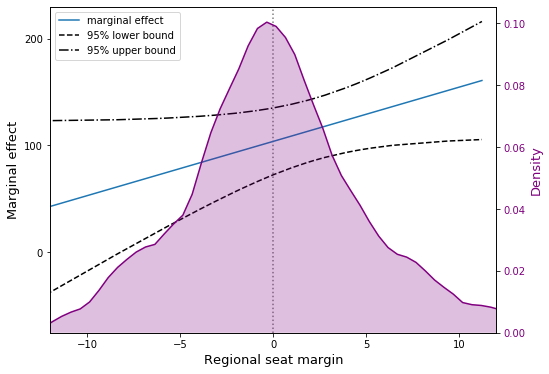

In [8]:
plot_figure7(data = data_mar, color = 'purple')

The figure 7(extended) shows the the RD marginal effects against the value of the Regional seat margin which is estimated in the regression with inclusion of time varying confounders. Basically, it looks almost same with figure 7, which means that result without taking the covariates into account is roughly robust to the other possible influences. However, as we checked the estimate of regional electoral competition's impact on alignment effects comes precise when  it is estimated with covariates, figure 7(extended) can be more precise figure which illustrates the marginal effect with regional seat margin. 

---
<span style="color:orange">**NOTE**:</span> For the extension of figure 7, I used both python and stata program to plot it. I used stata for generating different dummy variables needed to do regression with controls and marginal variable which represents marginal effects of alignment along the regions. Then with the new dta file, with name "db_marginal.dta", I created the above plot using python code. I attached my stata code in file folder with name "marginal_effects_controls_included". This code is extended by me based on the dta.file for the replication of Curto-Grau et al. (2018). 

---

---
# 6. Robustness Checks
---

 So far, the replication scrutinized the result of estimation on LATE and HLATE in Curto-Grau et al and chekced if the evidences support the prediction of the theoretical model regarding trade-off of regional presidents. Now, we will check up the robustness of the result. First, we will see whether the result changes when the definition of the alignment varies. Second, we will conduct the sensitivity analysis on the regression functional form(polinomial order) and the bandwidth. Finally, we will do the policy preference-based analysis where we can see if the main result varies when the different policy preference is taken in to account. 

## 6.1. Alternative Measures of Alignment

 Throughout the entire replication, the treatment status is defiend as that the mayor of municipality belongs to the same party of that of regional president, so called Mayor-President Alignment. As Curto-Grau et al. did, we will check the robustness in more comprehensive definition of alignment, namely "Partner alignment" and "Bloc alignment". Partner alignment refers to the situations in which the mayor and/or the main partner of a coalition belong to the same party. Bloc alignment refers to the situations in which the mayor and the regional president belong to
the same ideological bloc. The optimal bandwidths for both cases, partner alignment and bloc alignment, are recaculated based on Calonico, Cattaneo, and Titiunik (2014).

**Table_Robust 1 | Alternative alignment measures.** 

In [5]:
table_alt = table_alternative_alignment(data = data_full, data2 = data)
table_alt.round(3)

,LATE,SE(1),P-val(1),HLATE(Align*RSM),SE(2),P-val(2),RSM,SE(3),P-val(3),Bandwidth,Obs
RD,,,,,,,,,,,
Alignment,102.570,18.714,0.0,7.706,3.782,0.061,1.222,1.315,0.369,0.193,2576.0
Partner-Align,98.697,17.790,0.0,6.231,4.133,0.154,2.106,1.196,0.100,0.225,2950.0
Bloc-Align,97.726,17.967,0.0,6.170,4.166,0.161,2.078,1.158,0.094,0.219,2891.0


 In terms of LATE, all of the three alignment cases are precisely estimated, and the estimates are not very different to each other. Specifically, the more comprehensive the definition is slightly smaller are the alignment effects, but the difference is trivial. However, the estimates of HLATE are not statistically significant. Strictly, the estimates of parter-alignment and bloc-alignment were somewhat smaller and less precisely estimated. According to Curto-Grau et al, the difference can be explined by that when the party of the president and the mayor belong to a
different party (although to the same regional coalition), the regional incumbent has less room to reduce the favors made to aligned mayors in the face of an increase in regional competitiveness. Therefore, the main result on LATE is robust to different kind of alignment status, but HLATE is sensitive on the extension of alignment definition.

## 6.2. Sensitivity Analysis

### 6.2.1. Polynomial Order Sensitivity Test

 In the paper, the authors used quadratic polynomials for global estimate and local linear regression. According to Gelman. A. and Imbens. G. (2019), it is recommmended that researchers use estimators based on local linear or quadratic polynomials or other smooth functions. They provides three main reasons on their suggestion as follows. 
 
 
 
 - An estimate based on regression polynomials can be interpreted as the difference between a weighted average of the outcomes for the treated minus weighted average outcome of controls. The weights implied by by higher-order polynomial regressions can take an extreme values. 
 - Results for the causal effects of interest based on global high order poly-nomial regressions are sensitive to the order of the polynomial.
 - The confidence intervals based on such regressions, taking the polynomial as an accurate approximation to the conditional expectation, are often misleading.
 
 
 
 Keeping those comments in mind, I compared first, second and third order or polynomials, not fourth and fifth, and checked if the main result of Curto-Grau et al is still valid in different functional form. 

**Table_Robust 2 | Average effect of partisan alignment. Order of Global Polynomial**

In [20]:
# Global
table_Robust1 = table_Poly_Robust(data,bandwidth = 1)
table_Robust1.round(3)

,(1),(2),(3)
,,,
Second Stage,,,
Alignment,82.284,98.0568,106.345
se(2),10.5569,15.7375,18.0543
p-value(2),9.29994e-15,5.39921e-10,4.35407e-09
First Stage,,,
Reg vote margin,0.738392,0.701319,0.707113
se(1),0.0137596,0.0194215,0.0248149
p-value(1),0,1.2108e-231,1.34041e-155
Polynomial Order,1,2,3


**Table_Robust 3 | Average effect of partisan alignment. Order of Local Polynomial**

In [6]:
#Local with the optimal bandwidth = 0.193
table_Robust2 = table_Poly_Robust(data,bandwidth = 0.193)
table_Robust2.round(2)

,(1),(2),(3)
,,,
Second Stage,,,
Alignment,102.57,89.284,61.5795
se(2),18.7143,26.8849,62.5549
p-value(2),4.95086e-08,0.000918389,0.325073
First Stage,,,
Reg vote margin,0.71456,0.705054,0.752612
se(1),0.0253011,0.0385662,0.0527717
p-value(1),2.48282e-141,1.26124e-67,2.13692e-43
Polynomial Order,1,2,3


 The result of Table_Robust2 shows that global polynonial results are not very different and the estimates are precisely estimated. Curto-Grau et al addressed that the polynomnial order two is the one that maximizes the goodness of fit, but the results are robust to the order of polynomial chosen. Moreover, Table_Robust3 shows that local polynomial results are also similar and statistically significant. Therefore, we observed that both global and local alignment effects are robust to other polynomial orders selected.

### 6.2.2. Sensitivity Analysis of Bandwidth

   Curto-Grau et al. (2018) obtained the optimal bandwidth based on the procedures suggested by Calonico, Cattaneo, and Titiunik (2014). Calonico, Cattaneo, and Titiunik (2014) proposed new confidence interval for RD treatment effects that offer robustness to “large” bandwidths such as those usually obtained from cross-validation or asymptotic
mean squared error minimization. Since it is highly demanding to follow each step of the method, I skipped reproducing the caculation for gathering optimal bandwidth. Instead I visualized the relationship between bandwidth and RD estimate, with 95% confidence intervals. 

**Figure_Robust 1 ( Extension ) | Plot of Relationship Between Bandwidth and RD Estimate with 95% Confidence Intervals**

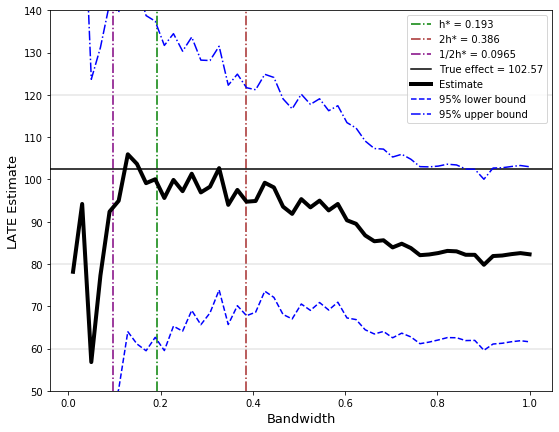

In [8]:
bandwidth_graph_LATE(data)

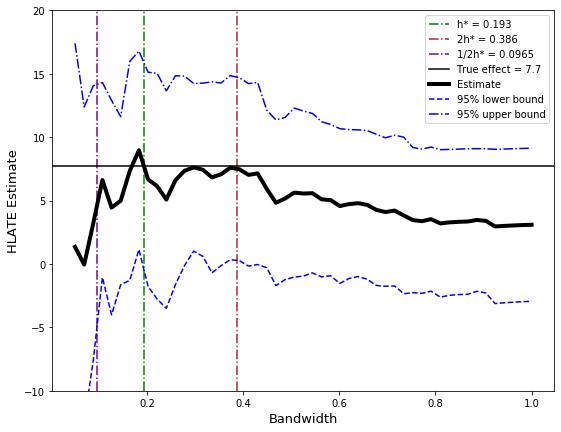

In [5]:
bandwidth_graph_HLATE(data)

 The visual inspection confirms the choice of bandwidth 0.193. In both graphs, the estimates hover right around the true impact with bandwidth choice between 1/2h×( = 0.0965) and 2h×( = 0.386). If the bandwidth choice is under 1/2h* , the precision of estimates crucially deteriorates. Also, if the bandwidth is expanded over 2h* , more consistently biased estimates result. Therefore, the results on LATE and HLATE of the paper are robust within the bandwidth choice between 1/2h* ( = 0.193) and 2h*  ( = 0.386). 

## 6.3. Policy Preference Based Analysis

 Curto-Grau et al. (2018) also discussed the possibility that the large difference in policy priorities between the left-wing and right-wing parties might increase the incentive for the regional governments to discriminate the allocation. For instance, let's say there is a left-wing regional president who wants to prioritize the expenditure on social service, such as building child care facilities, but doubts that the right-wing mayors will try to deviate the funds to other goals, such as road paving. In this case, it is natural that the regional left-wing government will allocate more funds to her co-partisans. Moreover, if the policy preference between the different parties increses when the regional electoral competition is low, it could be expected that the alignment effects grows as the election gets less competitive. 
 
 
 
 
 The authors, however, mentioned that the above story is less likely to be the actual case. Essentially, as the capital transfers are embarked to highly detailed project, and regional governments only approve fully speficied project, regional government should not worry about the cases where the municipalities use the funds to their purpose which is not on the list. 
 
 
 
 
 To investigate the validity of the previous argument, I ploted Figure_Robust 2 as Curto-Grau et al did. The authors have information on the share of capital expenditures allocated to the socail services which are supposed to be relative priority of the left. They used it to show graphically the alignment effect on the share of social spending for Low and High regional competition elections in governments controlled by the Left versus the Right.

**Figure_Robust 2 | Policy Preference_Based Analysis**

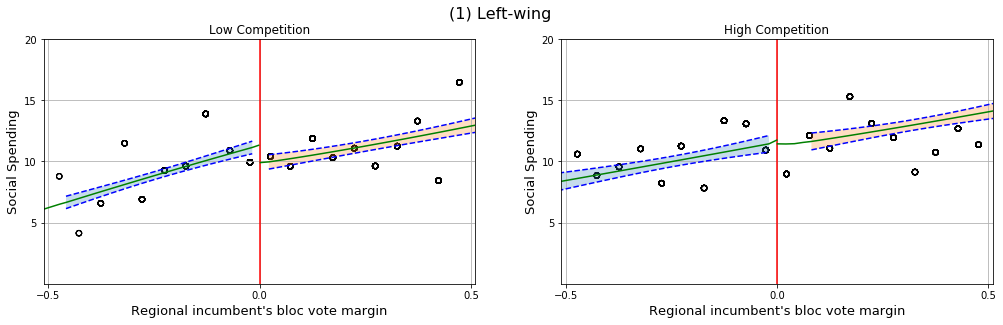

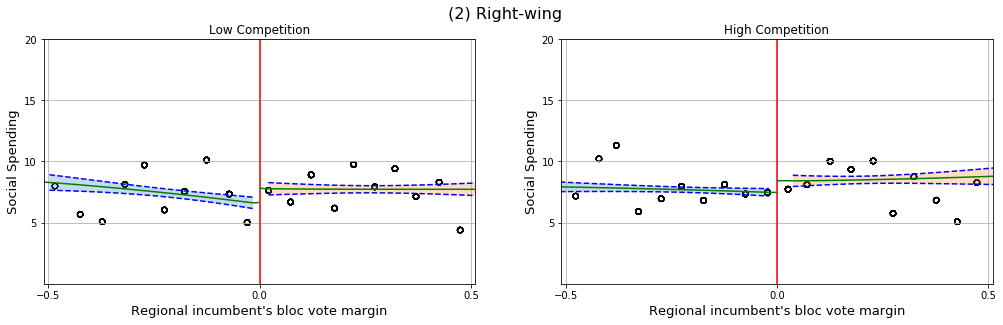

In [8]:
policy_preference_robust(data)

 As Figure_Robust 2 displays, there is no remarkable and sizable discontinuity on the share of expenditures in the social services at the threshold. As the authors expected, the municipalities under the left-wing regional government show, in general,  higher share of social spending than those under the right. Moreover, as the green line which represents the mean of estimates(calculated by bootstraping) is incraesing as the vote margine increases, which means that the more the mayor is left-leaning the larger the share of social spending is. 
 
 
 
 Nevertheless, the share of social spending is not discontinuous at the cutoff no matter that the regional government is on the left or right or whether the regional election is comeptitive or not. Therefore, the heterogeneity lying on the alignment effects on the social spending does not depend on whether a local government is under left of right regional government or whether the associated regional election is competitive or not. However, the author admits that the result is not fully testable, since it is based on just cross-sectional variation, and the information on the policy preference of municipalities is incomplete.  

---
# 7. Conclusion
---

  This notebook represents the replication on the main result of CURTO-GRAU et al. (2018), and the outcome of the replication mostly supports the evidences of the paper's result. We checked the alignment effects on transfer that regional presdient allocates more funds to mayors who are aligned with her party. By the graphical analysis, we saw the discontinuity on the transfer at the cutoff where the regional incumbent's bloc vote margin is zero, so to speak at the close election. Also we calculated the estimate of LATE with different bandwidth including optimal bandwidth and confirmed the results of CURTO-GRAU et al. However, the estimate of HLATE in the replication turned out to be less precisely estimated. To improve the precision, I included all observed covariates, and checked that the corresponding result recovers the precision and supports that the less regional election is competitive the larger alignment effects are. Therefore, those result uphold the prediction of the simple theoretical model where a regional incumbent faces a trade-off when deciding how to allocate funds to local governments. 
  
  
  
  
 
   The author represented DID estimates as well as RD estimates and compared those two, but I concentrated on the RD estimates which is the main result of the paper, and the test of the validity on RDD usage and robustness of the RD estimates. In general, the result satisfied three main assumptions for using RDD, 1) discontinuity at the cutoff, 2) no manipulation on the forcing variable and 3) continuity of covariates at the cutoff. Also RD estimates of LATE and HLATE both are robust at other polynomial orders(first, second and third) and bandwidth between 0.0965 and 0.386. 
   
   
   
   
   Also, we did simple analysis on policy preference to see whether the alignment effect on social spending which is supposed to be used in the projects left-leaning mayors would prefer depends on the regional government's policy preference. The outcome shows that there is no clear discontinuity on social expenditure between aligned and unaligned local government with regional government no matter it is left or right, or the election is contested or not. To obtain more precise result, it is required to access information on whether the municipalities decided not to submit any proposal when the regional policy preferences do not match those of local. 
   
   
   
   
   The result of CURTO-GRAU et al. (2018) shed light on the last regional election's impact on the bias of regional incumbent's fund allocation. However, since the behavioral motive of the party favoritism heterogeneous across region with different level of regional electoral competition is not discovered, the application of the result in the real world should be down in very careful way. 

# 8. References

- **Curto-Grau, M., Solé-Ollé, A., & Sorribas-Navarro, P. (2018).** Does electoral competition curb party favoritism?. American Economic Journal: Applied Economics, 10(4), 378-407.



- **Sascha O. Becker, Peter H. Egger, and Maximilian von Ehrlich. (2013).** Absortive Capacity and the Growth and Investment Effects of Regional Transfers: A Regression Discontinuity Design with Heterogeneous Treatment Effects. American Economic Journal:Economic Policy 2013, 5(4): 29–77.



- **Lee, D. S., & Lemieux, T. (2010).** Regression discontinuity designs in economics. Journal of economic literature, 48(2), 281-355.



- **Skovron, C., & Titiunik, R. (2015).** A practical guide to regression discontinuity designs in political science. American Journal of Political Science, 2015, 1-36.



- **Cerulli, G., Dong, Y., Lewbel, A., & Poulsen, A. (2017).** Testing stability of regression discontinuity models. Regression Discontinuity Designs: Theory and Applications, 38, 317Ā339.


- **Gelman, A., & Imbens, G. (2019).** Why high-order polynomials should not be used in regression discontinuity designs. Journal of Business & Economic Statistics, 37(3), 447-456.


- **Jacob, R., Zhu, P., Somers, M. A., & Bloom, H. (2012).** A practical guide to regression discontinuity. MDRC.



- **Folke, O. (2014)**. Shades of brown and green: party effects in proportional election systems. Journal of the European Economic Association, 12(5), 1361-1395.


- **Fiva, J. H., & Halse, A. H. (2016).** Local favoritism in at-large proportional representation systems. Journal of Public Economics, 143, 15-26.